## Homework 6

## <em> MLE, MCMC, Interpolation, Expectation Maximization (EM), and Resampling Methods</em>
<br>
This notebook is arranged in cells. Texts are usually written in the markdown cells, and here you can use html tags (make it bold, italic, colored, etc). You can double click on this cell to see the formatting.<br>
<br>
The ellipsis (...) are provided where you are expected to write your solution but feel free to change the template (not over much) in case this style is not to your taste. <br>
<br>
<em>Hit "Shift-Enter" on a code cell to evaluate it.  Double click a Markdown cell to edit. </em><br>

***
### Link Okpy

In [ ]:
from client.api.notebook import Notebook
ok = Notebook('hw7.ok')
_ = ok.auth(inline = True)

### Imports

In [1]:
import numpy as np
from scipy.integrate import quad
#For plotting
import matplotlib.pyplot as plt
%matplotlib inline

***

#### Supernova Cosmology Project

In this homework, we use a compilation of supernovae data to show that the expansion of the universe is accelerating, and hence it contains dark energy. This is the Nobel prize winning research in 2011 (https://www.nobelprize.org/nobel_prizes/physics/laureates/2011/), and Saul Perlmutter, a professor of physics at Berkeley, shared a prize in 2011 for this discovery.
<br><br>
"The expansion history of the universe can be determined quite easily, using as a “standard candle” any distinguishable class of astronomical objects of known intrinsic brightness that can be identified over a wide distance range. As the light from such beacons travels to Earth through an expanding universe, the cosmic expansion stretches not only the distances between galaxy clusters, but also the very wavelengths of the photons en route. By the time the light reaches us, the spectral wavelength $\lambda$ has thus been redshifted by precisely the same incremental factor $z = \Delta \lambda/\lambda$ by which the cosmos has been stretched in the time interval since the light left its source. The recorded redshift and brightness of each such object thus provide a measurement of the total integrated expansion of the universe since the time the light was emitted. A collection of such measurements, over a sufficient range of distances, would yield an entire historical record of the universe’s expansion." (Saul Perlmutter, http://supernova.lbl.gov/PhysicsTodayArticle.pdf).
<br><br>
Supernovae emerge as extremely promising candidates for measuring the cosmic expansion. Type I Supernovae arises from the collapse of white dwarf stars when the Chandrasekhar limit is reached. Such nuclear chain reaction occurs in the same way and at the same mass, the brightness of these supernovae are always the same. The relationship between the apparent brightness and distance of supernovae depend on the contents and curvature of the universe.
<br><br>
We can infer the "luminosity distance" $D_L$ from measuring the inferred brightness of a supernova of luminosity $L$. Assuming a naive Euclidean approach, if the supernova is observed to have flux $F$, then the area over which the flux is distributed is a sphere radius $D_L$, and hence <br><br>
$$F = \frac{L}{4\pi D_L^2}.$$
<br>
In Big Bang cosmology, $D_L$ is given by:
<br><br>
$$ D_L = \frac{\chi(a)}{a} $$
<br>
where $a$ is the scale factor ($\frac{\lambda_0}{\lambda} = 1 + z = \frac{a_0}{a}$, and the quantity with the subscript 0 means the value at present. Note that $z_0 = 1$.), and $\chi$ is the comoving distance, the distance between two objects as would be measured instantaneously today. For a photon, $cdt = a(t)d\chi$, so $\chi(t) = c\int_t^{t_0} \frac{dt'}{a(t')}$. We can write this in terms of a Hubble factor ($H(t) = \frac{1}{a}\frac{da}{dt}$), which tells you the expansion rate: $\chi(a) = c\int_a^1 \frac{da'}{a'^2H(a')} = c\int_0^z \frac{dz'}{H(z')}$. (change of variable using $a = \frac{1}{1+z}$.)
<br><br>
Using the Friedmann equation (which basically solves Einstein's equations for a homogenous and isotropic universe), we can write $H^2$ in terms of the mass density $\rho$ of the components in the universe: $H^2(z) = H_0^2[\Omega_m(1+z)^3 + (1-\Omega_m)(1+z)^2].$ <br><br>
$\Omega$ is the density parameter; it is the ratio of the observed density of matter and energy in the universe ($\rho$) to the critical density $\rho_c$ at which the universe would halt is expansion. So $\Omega_0$ (again, the subscript 0 means the value at the present) is the total mass and energy density of the universe today, and consequently $\Omega_0 = \Omega_{m}$ (matter density parameter today; remember we obtained the best-fit value of this parameter in Project 1?) = $\Omega_{\mathrm{baryonoic\ matter}}$ + $\Omega_{\mathrm{dark\ matter}}$. If $\Omega_0 < 1$, the universe will continue to expand forever. If $\Omega_0 > 1$, the expansion will stop eventually and the universe will start to recollapse. If $\Omega_0 = 1$, then the universe is flat and contains enough matter to halt the expansion but not enough to recollapse it. So it will continue expanding, but gradually slowing down all the time, finally running out of steam only in the infinite future. Even including dark matter in this calculation, cosmologists found that all the matters in the universe only amounts to about a quarter of the required critical mass, suggesting a continuously expanding universe with deceleration. Then, using all this, we can write the luminosity distance in terms of the density parameters: <br><br>
$$ D_L = \frac{\chi(a)}{a} = c(1+z)\int_0^z \frac{dz'}{H(z')} = c(1+z)\int_0^z \frac{dz'}{H_0[\Omega_m(1+z')^3 + (1-\Omega_m)(1+z')^2]^{1/2}}  $$ <br>
$$ = \frac{2997.92458}{h} (1+z)\int_0^z \frac{dz'}{[\Omega_m(1+z')^3 + (1-\Omega_m)(1+z')^2]^{1/2}}\ [unit\ of\ Mpc] $$
<br>
where $H_0 = 100\cdot h\ [km\cdot s^{-1} Mpc^{-1}]$.
<br><br>
Fluxes can be expressed in magnitudes $m$, where $m = -2.5\cdot\mathrm{log}_{10}F$ + const. The distance modulus is $\mu = m - M$ ($M$ is the absolute magnitude, the value of $m$ if the supernova is at a distance 10pc. Then, we have:
<br><br>
$$ \mu = 25 + 5\cdot \mathrm{log}_{10}\Big(D_L\ [in\ the\ unit\ of \ Mpc]\Big)$$
<br><br>
In this assignment, we use the SCP Union2.1 Supernova (SN) Ia compilation. (http://supernova.lbl.gov/union/)
<br><br>
First, load the measured data: $z$ (redshift), $\mu$ (distance modulus), $\sigma(\mu)$ (error on distance modulus)


In [100]:
data = np.loadtxt("sn_z_mu_dmu_plow_union2.1.txt", usecols=range(1,5))
# z
z_data = data[:,0]
# mu
mu_data = data[:,1]
# error on mu (sigma(mu))
mu_err_data = data[:,2]

<span style="color:blue"><i> 1. Plot the measured distance modulus as a function of redshift with errorbars. Then, assume three different scenarios: $\Omega_m = 0, 0.3, 1.$  </i></span> <br><br>
Remember:
$$ D_L = \frac{2997.92458}{h} (1+z)\int_0^z \frac{dz'}{[\Omega_m(1+z')^3 + (1-\Omega_m)(1+z')^2]^{1/2}}$$ <br>
$$ \mu = 25 + 5\cdot \mathrm{log}_{10}(D_L)$$ <br><br>
<span style="color:blue"><i> Now, plot three curves of $\mu$ as a function of $z$ for $\Omega_m = 0, 0.3, 1$ on top of the measured data (Calculate $D_L$ using quad. For now, assume $h = 0.7$.) How do they fit? </i></span> <br>


In [151]:
import math

def integrand_DL(z,Omegam):
    return (Omegam*(1+z)**3 + (1-Omegam)*(1+z)**2)**(-1/2)

def DL_integrate(z,Omegam):
    DLval = 2997.92458/0.7*(1.0+z)*quad(integrand_DL, 0, z, args = (Omegam,))[0]
    return DLval

def mu_model(z,Omegam):
    mu_model = 25.0 + 5.0*math.log10(DL_integrate(z,Omegam))
    return mu_model

In [152]:
z = np.linspace(0.01, 1.5, 100)
Mu1 = np.zeros(len(z))
Mu2 = np.zeros(len(z))
Mu3 = np.zeros(len(z))

for i in range(len(z)):
    Mu1[i] = mu_model(z[i],0)
    
for i in range(len(z)):
    Mu2[i] = mu_model(z[i],0.3)

for i in range(len(z)):
    Mu3[i] = mu_model(z[i],1)

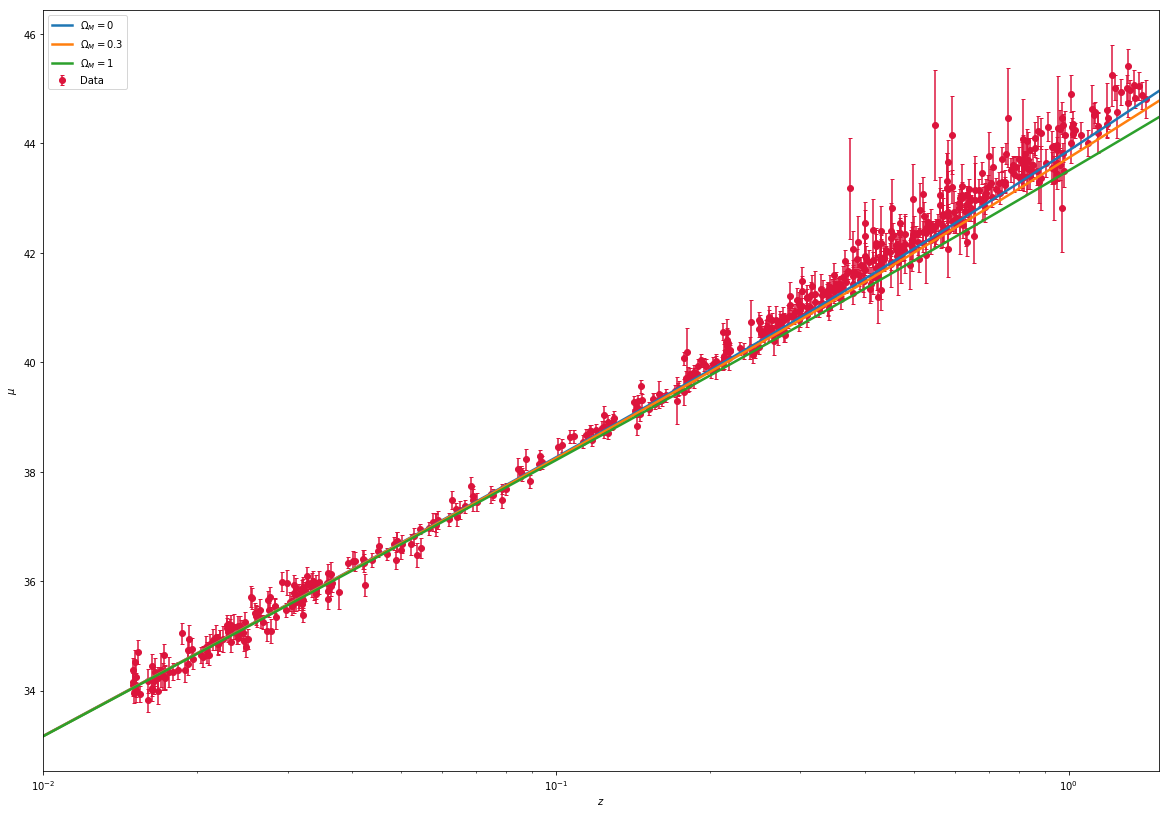

In [154]:
plt.figure(figsize = (20,14))

plt.errorbar(z_data, mu_data, yerr = mu_err_data, marker = 'o', mfc='crimson', mec='crimson', ecolor = 'crimson', elinewidth = 1.5, barsabove = True, capsize = 2.0,  linestyle = 'None', label = 'Data')

plt.semilogx(z, Mu1, linewidth = 2.5, label = '$\Omega_M = 0$')
plt.semilogx(z, Mu2, linewidth = 2.5, label = '$\Omega_M = 0.3$')
plt.semilogx(z, Mu3, linewidth = 2.5, label = '$\Omega_M = 1$')

plt.legend()
plt.xlim(0.01, 1.5)
plt.xlabel('$z$')
plt.ylabel('$\mu$')
plt.show()

You should find that the measured data do not fit well to all three scenarios. "The high-redshift supernovae are fainter than would be expected even for an empty cosmos (corresponding to $\Omega_m = 0$)." So what's wrong? 
<br><br>
"If these data are correct, the obvious implication is that the simplest cosmological model must be too simple. The next simplest model might be one that Einstein entertained for a time. Believing the universe to be static, he tentatively introduced into the equations of general relativity an expansionary term he called the “cosmological constant” ($\Lambda$) that would compete against gravitational collapse. After Hubble’s discovery of the cosmic expansion, Einstein famously rejected $\Lambda$ as his “greatest blunder.” In later years, $\Lambda$ came to be identified with the zero-point vacuum energy of all quantum fields. It turns out that invoking a cosmological constant allows us to fit the supernova data quite well." (Saul Perlmutter, https://www.nobelprize.org/nobel_prizes/physics/laureates/2011/)
<br><br>
So in short, the data indicates that faint supernovae are further away from the earth than had been theoretically expected. The expansion rate of the universe is increasing indeed. It seems that some mysterious material (which we call "dark energy") is causing such antigravity effects. The cosmological constant, $\Lambda$, the value of the energy density of the vacuum of space is widely accepted as a leading candidate of dark energy. 
<br><br>
Now let us add a general form of dark energy to our model.
<br><br>
$$H^2(z) = H_0^2[\Omega_m(1+z)^3 + \Omega_{DE}(1+z)^{3(1+w)} + (1-\Omega_m-\Omega_{DE})(1+z)^2].$$ <br> $w$ is the dark energy equation of state, which is the ratio of its pressure to its energy density. $w = -1$ for the cosmological constant $\Lambda$. <br><br>
$\Omega_0 = \Omega_{m}$ (matter density parameter today) + $\Omega_{DE}$ (dark energy density parameter today), and 
<br><br>
$$ D_L = \frac{\chi(a)}{a} = c(1+z)\int_0^z \frac{dz'}{H(z')} = c(1+z)\int_0^z \frac{dz'}{H_0[\Omega_m(1+z')^3 + \Omega_{DE}(1+z')^{3(1+w)} + (1-\Omega_m-\Omega_{DE})(1+z')^2]^{1/2}}  $$ <br>
$$ = \frac{2997.92458}{h} (1+z)\int_0^z \frac{dz'}{[\Omega_m(1+z')^3 + \Omega_{DE}(1+z')^{3(1+w)} + (1-\Omega_m-\Omega_{DE})(1+z')^2]^{1/2}}\ [unit\ of\ Mpc] $$
<br>
where $H_0 = 100\cdot h\ [km\cdot s^{-1} Mpc^{-1}]$.

<span style="color:blue"> <i> 2. Now assume three different scenarios: ($\Omega_m = 0.3, \Omega_{DE} = 0$), ($\Omega_m = 0, \Omega_{DE} = 1, w = -1$), and ($\Omega_m = 0.3, \Omega_{DE} = 0.7, w = -1$). Again, plot three curves of $\mu$ as a function of $z$ on top of data (assume $h = 0.7$) </i></span><br>


In [146]:
def integrand_DL(z,Omegam,OmegaDE,w):
    return (Omegam*(1+z)**3 + OmegaDE*(1+z)**(3*(1+w)) + (1-Omegam-OmegaDE)*(1+z)**2)**(-1/2)

def DL_integrate(z,Omegam,OmegaDE,w):
    DLval = 2997.92458/0.7*(1.0+z)*quad(integrand_DL, 0, z, args = (Omegam,OmegaDE,w,))[0]
    return DLval

def mu_model(z,Omegam,OmegaDE,w):
    mu_model = 25.0 + 5.0*math.log10(DL_integrate(z,Omegam,OmegaDE,w))
    return mu_model

In [149]:
z = np.linspace(0.01, 1.5, 100)
Mu1 = np.zeros(len(z))
Mu2 = np.zeros(len(z))
Mu3 = np.zeros(len(z))

for i in range(len(z)):
    Mu1[i] = mu_model(z[i],0.3, 0, 0)
    
for i in range(len(z)):
    Mu2[i] = mu_model(z[i],0, 1., -1)

for i in range(len(z)):
    Mu3[i] = mu_model(z[i],0.3, 0.7, -1)

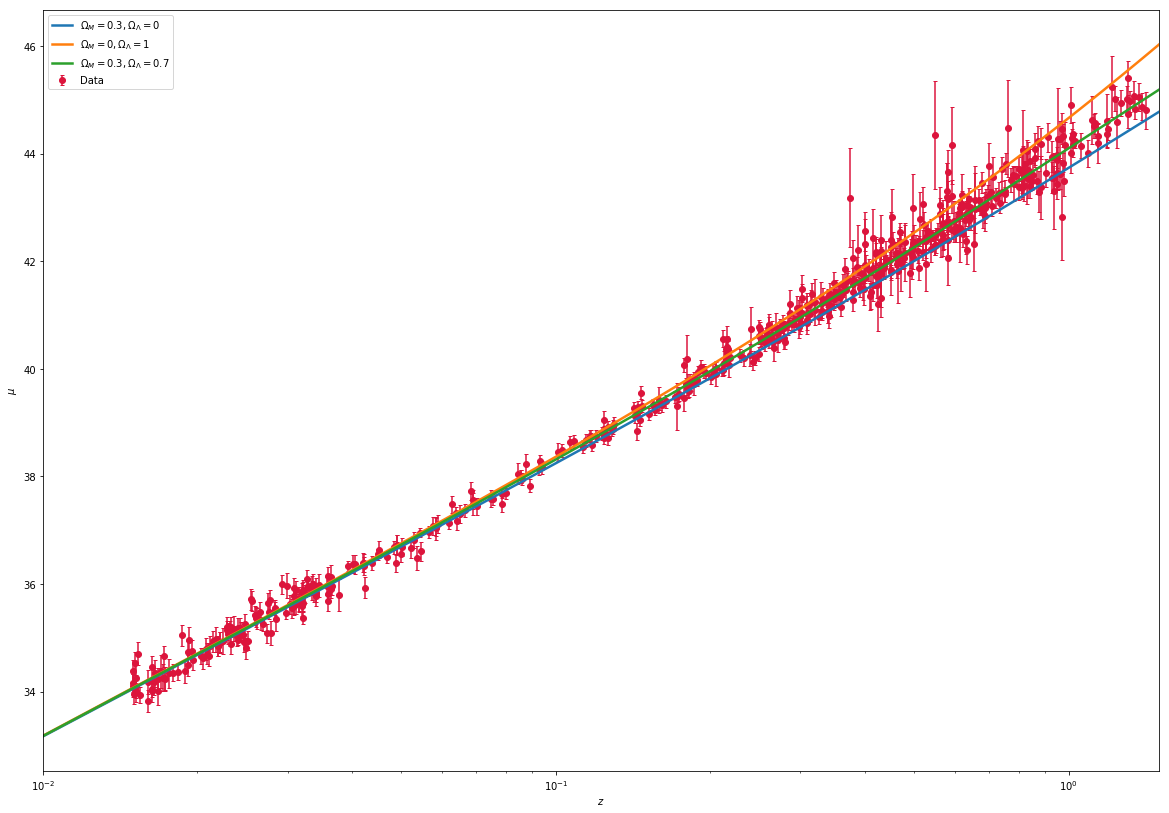

In [150]:
plt.figure(figsize = (20,14))

plt.errorbar(z_data, mu_data, yerr = mu_err_data, marker = 'o', mfc='crimson', mec='crimson', ecolor = 'crimson', elinewidth = 1.5, barsabove = True, capsize = 2.0,  linestyle = 'None', label = 'Data')

plt.semilogx(z, Mu1, linewidth = 2.5, label = '$\Omega_M = 0.3, \Omega_{\Lambda} = 0$')
plt.semilogx(z, Mu2, linewidth = 2.5, label = '$\Omega_M = 0, \Omega_{\Lambda} = 1$')
plt.semilogx(z, Mu3, linewidth = 2.5, label = '$\Omega_M = 0.3, \Omega_{\Lambda} = 0.7$')

plt.legend()
plt.xlim(0.01, 1.5)
plt.xlabel('$z$')
plt.ylabel('$\mu$')
plt.show()

You basically reproduced the below figure!
![alt text](SN.png "Title")
You should see that $\Omega_m = 0.3$ and $\Omega_m = 0.7$ fits the data best. In combination with the CMB data, this shows that about 70% of the total energy density is vacuum energy and 30% is mass.

***

Now, with measurements of the distance modulus $\mu$, use Bayesian analysis to estimate the cosmological parameters.
<br><br>
let us assume that the universe is flat (which is a fair assumption since the CMB measurements indicate that the universe has no large-scale curvature). $\Omega_0 = \Omega_m + \Omega_{DE} = 1$. Then, we do not need to worry about the curvature term:<br><br>
$$ D_L = \frac{\chi(a)}{a} = c(1+z)\int_0^z \frac{dz'}{H(z')} = c(1+z)\int_0^z \frac{dz'}{H_0[\Omega_m(1+z')^3 + (1-\Omega_m)(1+z')^{3(1+w)}]^{1/2}}  $$ <br>
$$ = \frac{2997.92458}{h} (1+z)\int_0^z \frac{dz'}{[\Omega_m(1+z')^3 + (1-\Omega_m)(1+z')^{3(1+w)}]^{1/2}}\ [unit\ of\ Mpc] $$<br>
where $H_0 = 100\cdot h\ [km\cdot s^{-1} Mpc^{-1}]$.<br><br>
Assuming that errors are Gaussian (can be justified by averaging over large numbers of SN; central limit theorem), we calculate the likelihood $L$ as: <br><br>
$$ L \propto \mathrm{exp}\Big( -\frac{1}{2} \sum_{i = 1}^{N_{\mathrm{SN}}} \frac{[\mu_{i,\ data}(z_i) - \mu_{i,\ model}(z_i, \Omega_m, w)]^2}{\sigma(\mu_i)^2} \Big) $$
<br>
where $z_i, \mu_i, \sigma(\mu_i)$ are from the measurements, and we compute $\mu_{model}$ as a function of $z, \Omega_m, w$.

<br><br>
First, try the <b>maximum likelihood estimation (MLE)</b>. 
<br><br>

<span style="color:blue"> <i> 3. Assuming that $h$ = 0.7, find the maximum likelihood estimation of $\Omega_m$ and $w$ (i.e. find $\Omega_m$ and $w$ which maximizes the likelihood. 
</i></span><br><br>
(Hint: This is very similar to Problem 2-1, HW6. Take the log of the likelihood and maximize it using scipy.optimize.fmin (https://docs.scipy.org/doc/scipy-0.19.1/reference/generated/scipy.optimize.fmin.html). Note that you need to make initial guesses on the parameters in order to use fmin. You can set them to be 0. Caveat: "fmin" minimizes a given function, so you should multiply the log-likelihood by $-1$ in order to maximize it using fmin.)
<br>


In [280]:
def integrand_DL(z,Omegam,w):
    return (Omegam*(1+z)**3 + (1-Omegam)*(1+z)**(3*(1+w)))**(-1/2)
            
def DL_integrate(z,Omegam,w):
    DLval = 2997.92458/0.7*(1.0+z)*quad(integrand_DL, 0, z, args = (Omegam,w,))[0]
    return DLval

def mu_model(z,Omegam,w):
    mu_model = 25.0 + 5.0*math.log10(DL_integrate(z,Omegam,w))
    return mu_model


In [281]:
from scipy import optimize

def minus_log_likelihood(param):
    "Ln of likelihood for flat Universe and SN distance modulus data"
    Omegam, w = param
    
    if(Omegam<=0 or w>=0):
        lnL = -1.e100
    else:
    
        Dmu = np.zeros(len(z_data))
        for j in range (len(z_data)):
            Dmu[j] = mu_data[j]-mu_model(z_data[j],Omegam,w)
        lnL = -0.5*sum((Dmu/mu_err_data)**2)

    return -lnL

In [282]:
Omegam, w = optimize.fmin(minus_log_likelihood, [0, 0], disp=False)
print('MAP solution')
print('Omega_m = ', Omegam, ', w = ', w)

MAP solution
Omega_m =  0.279623652309 , w =  -1.00446144287


***

Next, write an MCMC code using the <b>Metropolis algorithm</b>. In this problem, assume that the universe is flat, and $w = -1$ (dark energy is $\Lambda$.) We call this flat $\Lambda$CDM cosmology. By fixing $h$ and $w$, $D_L = D_L(z, \Omega_m)$.
<br><br>
First, I precalculated $D_L$ for $h = 0.7$ from 2 one-dimensional vectors giving the tabulated values of the parameters $z$ and $\Omega_m$ in the range $0.01 < z < 1.5$ and $0.01 < \Omega_m < 1$. We call the tabulated values of $z$ and $\Omega_m$ as "z_fit" (length 200) and "Om0_fit" (length 100). Then, "DL_fit" is a 2-dimensional grid of tabulated values of $D_L$ (its dimension 200 $\times$ 100. i.e. $D_L$[i,j] is $D_L$$\big($$z$ = z_fit[i], $\Omega_m$ = Om0_fit[j]$\big)$
<br><br>
Now using a 2-D spline interpolation, estimate $D_L(z, \Omega_m)$ for any $z$ and $\Omega_m$.
<br><br>
<span style="color:blue"> <i> 4. Using scipy.interpolate.RectBivariateSpline, estimate $D_L(z, \Omega_m)$ for any $z$ and $\Omega_m$. Plot $\mu = 25 + 5\cdot \mathrm{log}_{10}(D_L(z, \Omega_m = 0.3))$ as a function of $z$ on top of the measured data. How does it fit to the data? </i></span>
<br><br>
(Hint: Let z_spline = RectBivariateSpline(x_fit,y_fit,z_fit). Then, z_spline.ev(x,y) will evaulate the spline at given positions x and y.)

In [138]:
DL_fit = np.loadtxt("DL_fit.txt").T
Om0_fit = np.loadtxt("Om0_fit.txt")
z_fit = np.loadtxt("z_fit.txt")

In [115]:
from scipy.interpolate import RectBivariateSpline

In [170]:
DL_spline = RectBivariateSpline(z_fit, Om0, DL_fit)

def mu_model(z,Omegam):
    mu_model = 25.0 + 5.0*np.log10(DL_spline.ev(z, Omegam))
    return mu_model

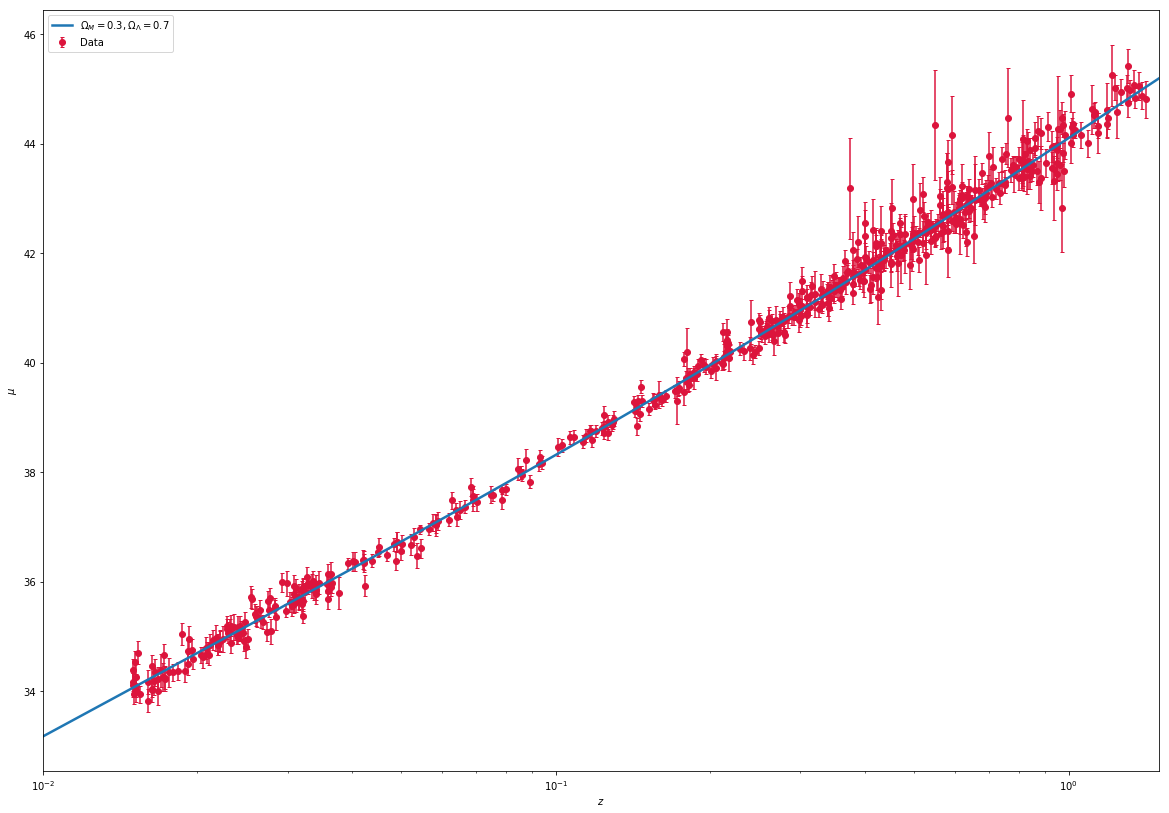

In [171]:
z = np.linspace(0.01, 1.5, 100)

plt.figure(figsize = (20,14))

plt.errorbar(z_data, mu_data, yerr = mu_err_data, marker = 'o', mfc='crimson', mec='crimson', ecolor = 'crimson', elinewidth = 1.5, barsabove = True, capsize = 2.0,  linestyle = 'None', label = 'Data')
plt.semilogx(z, mu_model(z, 0.3), linewidth = 2.5, label = '$\Omega_M = 0.3, \Omega_{\Lambda} = 0.7$')

plt.legend()
plt.xlim(0.01, 1.5)
plt.xlabel('$z$')
plt.ylabel('$\mu$')
plt.show()

<br><br>
Now, run the MCMC code to estimate $\Omega_m$.

In [ ]:
# The following is a modified version of the code written by Alan Heavens (http://www.imperial.ac.uk/media/imperial-college/research-centres-and-groups/astrophysics/public/icic/data-analysis-workshop/2016/SNcodePython.txt)

# Import data
data = np.loadtxt("sn_z_mu_dmu_plow_union2.1.txt", usecols=range(1,5))
# z
z_data = data[:,0]
# mu
mu_data = data[:,1]
# error on mu (sigma(mu))
mu_err_data = data[:,2]

# length of MCMC chains
nsamples = 10000
# number of parameters
npars    = 1

# Define (gaussian) width of the proposal distribution, one for each parameter. This determines how far you propose jumps
Sigma = [0.01]

# Number of supernova:
nSN = len(z_data)

# Declare an empty array of the parameter values of each point. 
# Theta[:,0] stores a trace of the parameter \Omega_m  
# Theta[:,1] stores log-likelihood values at each point
Theta          = np.empty([nsamples,npars+1])

# Dmu stores mu(data)-mu(theory), temporarily:
Dmu = np.empty(nSN)

# Random starting point in parameter space
# Set initial likelihood to low value so next point is accepted (could compute it instead):
Theta[0,:] = [np.random.uniform(), -1.e100]

In Part 4, you calculated $\mu$ from the $\Lambda$CDM model given $z$ and $\Omega_m$, using $D_L$ from the 2D spline interpolation. Using this result, define a function $\mu_{model}$ which outputs $\mu$ from the $\Lambda$CDM theory model given $z$ and $\Omega_m$. Then, Dmu[j] = mu_data[j]-mu_model(z_data[j],Omegam), and the log-likelihood is 
<br><br>
$$ \mathrm{ln}(L) \approx -\frac{1}{2} \sum_{i = 1}^{N_{\mathrm{SN}}} \frac{[\mu_{i,\ data}(z_i) - \mu_{i,\ model}(z_i, \Omega_m)]^2}{\sigma(\mu_i)^2} = -\frac{1}{2} \sum_{i = 1}^{N_{\mathrm{SN}}} \frac{Dmu_i^2}{\sigma(\mu_i)^2} $$

<span style="color:blue"> <i> 5. Define a function for mu_model (mu predicted from theory) and lnL (log-likelihood). Then, you can run the MCMC code and plot the posterior (the routine already given).</i></span>
<br>

10 percent done
20 percent done
30 percent done
40 percent done
50 percent done
60 percent done
70 percent done
80 percent done
90 percent done


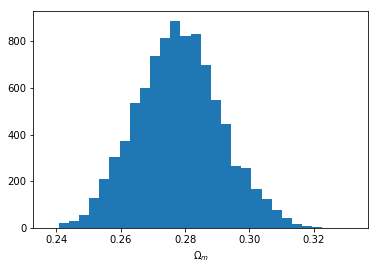

Omega_m =  0.278042590783 +/- 0.0131514263639


In [173]:
def mu_model(z,Omegam):
    mu_model = 25.0 + 5.0*np.log10(DL_spline.ev(z, Omegam))
    return mu_model

# Define the likelihood function:

def lnL(Omegam):

    # Treat unphysical regions by setting likelihood to (almost) zero:    
    if(Omegam<=0):
        lnL = -1.e100
    else:
            
    # Compute difference with theory mu at redshifts of the SN, for trial Omegam
        for j in range (nSN):
            Dmu[j] = mu_data[j]-mu_model(z_data[j],Omegam)

    # Compute ln(likelihood) assuming gaussian errors
        lnL = -0.5*sum((Dmu/mu_err_data)**2)
        
    return lnL


# Draw new proposed samples from a proposal distribution, centred on old values Omegam[i-1]
# Accept or reject, and colour points according to ln(likelihood):

# Compute initial likelihood value:
Theta[0,npars] = lnL(Theta[0,0])

progress = nsamples/10; val = 0
for i in range(1,nsamples):    
    
    if i%progress == 0:
        val = val + 10
        print("%d percent done" %val)
    
    lnLPrevious = Theta[i-1,npars]
    OmegamProp = np.random.normal(Theta[i-1,0],Sigma[0])
    
    lnLProp    = lnL(OmegamProp)

    # Metroplis-Hastings algorithm:

    if(lnLProp > lnLPrevious):
    # Accept point if likelihood has gone up:
        Theta[i,0]     = OmegamProp
        Theta[i,npars] = lnLProp
    else:
    # Otherwise accept it with probability given by ratio of likelihoods:
        alpha = np.random.uniform()
    
        if(lnLProp - lnLPrevious > np.log(alpha)):
            Theta[i,0]     = OmegamProp
            Theta[i,npars] = lnLProp
        else:
        # Reject; Repeat the previous point in the chain:
            Theta[i,0]     = Theta[i-1,0]
            Theta[i,npars] = lnLPrevious

# Remove a burn in period, arbitrarily chosen to be the first 10% of the chain:
nburn = math.floor(nsamples/10)
    

# Plot the histogram of Omegam after the burn-in phase:
plt.hist(Theta[nburn:,0],bins=30)
plt.xlabel(r'$\Omega_m$')
plt.show()

# Determine the best-fit value and constraint
print ('Omega_m = ',np.mean(Theta[nburn:nsamples,0]), '+/-' ,np.std(Theta[nburn:nsamples,0]))


<br><br> Now, assume a more general form of dark energy, as in Part 3. (Do not fix $w$ to -1; add $w$ as a parameter.)

In the flat universe, <br><br>
$$ D_L = \frac{\chi(a)}{a} = c(1+z)\int_0^z \frac{dz'}{H(z')} = c(1+z)\int_0^z \frac{dz'}{H_0[\Omega_m(1+z')^3 + (1-\Omega_m)(1+z')^{3(1+w)}]^{1/2}}  $$ <br>
$$ = \frac{2997.92458}{h} (1+z)\int_0^z \frac{dz'}{[\Omega_m(1+z')^3 + (1-\Omega_m)(1+z')^{3(1+w)}]^{1/2}}\ [unit\ of\ Mpc] $$
<br>
where $H_0 = 100\cdot h\ [km\cdot s^{-1} Mpc^{-1}]$. Here, we fix $h = 0.7$.<br><br>
We calculate the likelihood $L$ as: <br><br>
$$ \mathrm{ln}(L) \approx -\frac{1}{2} \sum_{i = 1}^{N_{\mathrm{SN}}} \frac{[\mu_{i,\ data}(z_i) - \mu_{i,\ model}(z_i, \Omega_m, w)]^2}{\sigma(\mu_i)^2} = -\frac{1}{2} \sum_{i = 1}^{N_{\mathrm{SN}}} \frac{Dmu_i^2}{\sigma(\mu_i)^2} $$
<br>
where $$ \mu_{i,\ model}(z_i, \Omega_m, w) = 25 + 5\cdot \mathrm{log}_{10}(D_{L,\ i})$$<br>
$$ D_{L,\ i} = \frac{2997.92458}{0.7} (1+z_i)\int_0^{z_i} \frac{dz'}{[\Omega_m(1+z')^3 + (1-\Omega_m)(1+z')^{3(1+w)}]^{1/2}} $$
<br><br>
<span style="color:blue"> <i> 6. Modify the code in Part 5 (most routine already given) and run the MCMC code to estimate $w$ and $\Omega_m$. (npars = 2 in this case). Plot 1-d posterior of $w$ and $\Omega_m$ as well as 2-d posterior (i.e. plot the chain in two-dimensional parameter space. Make sure that the chain has converged (you can change nsamples, nburn).  </i></span><br><br>


In [200]:
# Import data
data = np.loadtxt("sn_z_mu_dmu_plow_union2.1.txt", usecols=range(1,5))
# z
z_data = data[:,0]
# mu
mu_data = data[:,1]
# error on mu (sigma(mu))
mu_err_data = data[:,2]

# length of MCMC chains
nsamples = 15000
# number of parameters
npars    = 2

# Define (gaussian) width of the proposal distribution, one for each parameter. This determines how far you propose jumps
Sigma = [0.01, 0.01]

# Number of supernova:
nSN = len(z_data)

# Declare an empty array of the parameter values of each point. 
# Theta[:,0] stores a trace of the parameter \Omega_m  
# Theta[:,1] stores a trace of the parameter w 
# Theta[:,2] stores log-likelihood values at each point
Theta          = np.empty([nsamples,npars+1])

# Dmu stores mu(data)-mu(theory), temporarily:
Dmu = np.empty(nSN)

# Random starting point in parameter space
# Set initial likelihood to low value so next point is accepted (could compute it instead):
Theta[0,:] = [np.random.uniform(), -np.random.uniform(), -1.e100]

In [201]:
# Define mu from theory
def integrand_DL(z,Omegam,w):
    return (Omegam*(1+z)**3 + (1-Omegam)*(1+z)**(3*(1+w)))**(-1/2)
            
def DL_integrate(z,Omegam,w):
    DLval = 2997.92458/0.7*(1.0+z)*quad(integrand_DL, 0, z, args = (Omegam,w,))[0]
    return DLval

def mu_model(z,Omegam,w):
    mu_model = 25.0 + 5.0*math.log10(DL_integrate(z,Omegam,w))
    return mu_model

10 percent done
20 percent done
30 percent done
40 percent done
50 percent done
60 percent done
70 percent done
80 percent done
90 percent done


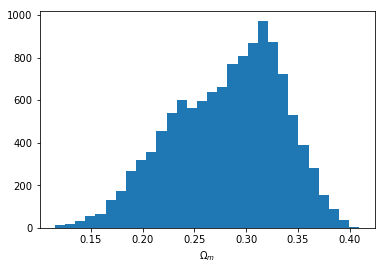

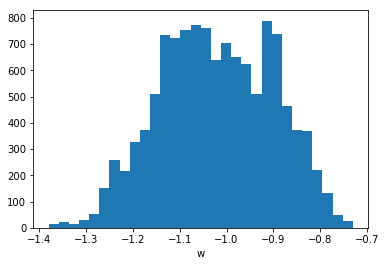

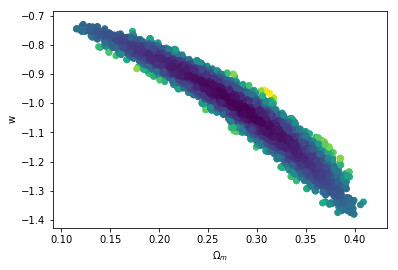

Omega_m =  0.281536293168 +/- 0.052917455328
w =  -1.02060694006 +/- 0.12060674916


In [202]:
# Define the likelihood function:

def lnL(Omegam, w):

    # Treat unphysical regions by setting likelihood to (almost) zero:    
    if(Omegam<=0 or w>=0):
        lnL = -1.e100
    else:
            
    # Compute difference with theory mu at redshifts of the SN, for trial Omegam
        for j in range (nSN):
            Dmu[j] = mu_data[j]-mu_model(z_data[j],Omegam,w)

    # Compute ln(likelihood) assuming gaussian errors
        lnL = -0.5*sum((Dmu/mu_err_data)**2)
        
    return lnL


# Draw new proposed samples from a proposal distribution, centred on old values Omegam[i-1]
# Accept or reject, and colour points according to ln(likelihood):

# Compute initial likelihood value:
Theta[0,npars] = lnL(Theta[0,0], Theta[0,1])

progress = nsamples/10; val = 0
for i in range(1,nsamples):    
    
    if i%progress == 0:
        val = val + 10
        print("%d percent done" %val)
    
    lnLPrevious = Theta[i-1,npars]
    OmegamProp = np.random.normal(Theta[i-1,0],Sigma[0])
    wProp = np.random.normal(Theta[i-1,1],Sigma[1])
    
    lnLProp    = lnL(OmegamProp, wProp)

    # Metroplis-Hastings algorithm:

    if(lnLProp > lnLPrevious):
    # Accept point if likelihood has gone up:
        Theta[i,0]     = OmegamProp
        Theta[i,1]     = wProp
        Theta[i,npars] = lnLProp
    else:
    # Otherwise accept it with probability given by ratio of likelihoods:
        alpha = np.random.uniform()
    
        if(lnLProp - lnLPrevious > np.log(alpha)):
            Theta[i,0]     = OmegamProp
            Theta[i,1]     = wProp
            Theta[i,npars] = lnLProp
        else:
        # Reject; Repeat the previous point in the chain:
            Theta[i,0:2]     = Theta[i-1,0:2]
            Theta[i,npars] = lnLPrevious

# Remove a burn in period, arbitrarily chosen to be the first 20% of the chain:
nburn = 2*math.floor(nsamples/10)
    

# Plot the histogram of Omegam after the burn-in phase:
plt.hist(Theta[nburn:,0],bins=30)
plt.xlabel(r'$\Omega_m$')
plt.show()

# Plot the histogram of w after the burn-in phase:
plt.hist(Theta[nburn:,1],bins=30)
plt.xlabel('w')
plt.show()

# Scatter plot of the samples (2-d posterior):
plt.scatter(Theta[nburn:,0], Theta[nburn:,1], c = -Theta[nburn:,npars])
plt.xlabel(r'$\Omega_m$')
plt.ylabel('w')
plt.show() 

# Print best-fit values and constraints
print ('Omega_m = ',np.mean(Theta[nburn:nsamples,0]), '+/-' ,np.std(Theta[nburn:nsamples,0]))
print ('w = ',np.mean(Theta[nburn:nsamples,1]), '+/-' ,np.std(Theta[nburn:nsamples,1]))


<br><br>
Now, include the distance modulus of 12 additional supernovae, which are not-so-good standard candles. They are 3$\sigma$ away from the best-fit mode. 

In [332]:
data = np.loadtxt("sn_z_mu_dmu_plow_union2.1_outlier.txt", usecols=range(1,5))
# z
z_data = data[:,0]
# mu
mu_data = data[:,1]
# error on mu (sigma(mu))
mu_err_data = data[:,2]

So we have a total of 592 supernovae, and we can see that the last 12 supernovae seem to be outliers. (i.e. mu_data[580:] contains the distance modulus measurements of these 12 supernovae.)
<br><br>
<span style="color:blue"> <i> 7. First run the MCMC code in Part 6 with the new data (total of 592 supernovae). Then, using the estimates of $\Omega_m$ and $w$ from the MCMC chain, calculate the distance modulus from theory and plot the curve on top of the measured data. Plot the measurements of the last 12 supernovae with different color. </i></span><br>

10 percent done
20 percent done
30 percent done
40 percent done
50 percent done
60 percent done
70 percent done
80 percent done
90 percent done


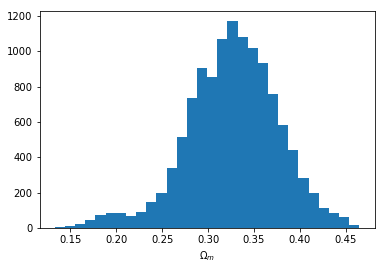

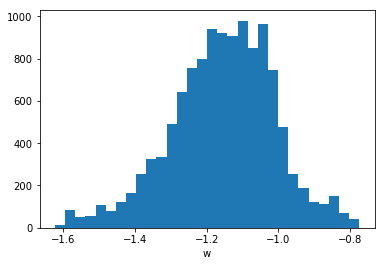

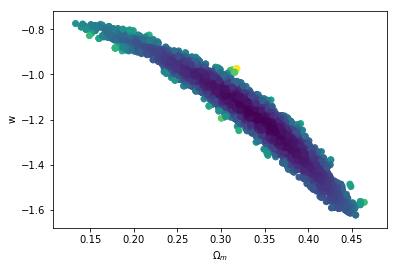

Omega_m =  0.326233670833 +/- 0.0499207926532
w =  -1.15508240682 +/- 0.144871273787


In [199]:
# length of MCMC chains
nsamples = 15000
# number of parameters
npars    = 2

# Define (gaussian) width of the proposal distribution, one for each parameter. This determines how far you propose jumps
Sigma = [0.01, 0.01]

# Number of supernova:
nSN = len(z_data)

# Declare an empty array of the parameter values of each point. 
# Theta[:,0] stores a trace of the parameter \Omega_m  
# Theta[:,1] stores a trace of the parameter w 
# Theta[:,2] stores log-likelihood values at each point
Theta          = np.empty([nsamples,npars+1])

# Dmu stores mu(data)-mu(theory), temporarily:
Dmu = np.empty(nSN)

# Random starting point in parameter space
# Set initial likelihood to low value so next point is accepted (could compute it instead):
Theta[0,:] = [np.random.uniform(), -np.random.uniform(), -1.e100]

# Define mu from theory
def integrand_DL(z,Omegam,w):
    return (Omegam*(1+z)**3 + (1-Omegam)*(1+z)**(3*(1+w)))**(-1/2)
            
def DL_integrate(z,Omegam,w):
    DLval = 2997.92458/0.7*(1.0+z)*quad(integrand_DL, 0, z, args = (Omegam,w,))[0]
    return DLval

def mu_model(z,Omegam,w):
    mu_model = 25.0 + 5.0*math.log10(DL_integrate(z,Omegam,w))
    return mu_model

# Define the likelihood function:

def lnL(Omegam, w):

    # Treat unphysical regions by setting likelihood to (almost) zero:    
    if(Omegam<=0 or w>=0):
        lnL = -1.e100
    else:
            
    # Compute difference with theory mu at redshifts of the SN, for trial Omegam
        for j in range (nSN):
            Dmu[j] = mu_data[j]-mu_model(z_data[j],Omegam,w)

    # Compute ln(likelihood) assuming gaussian errors
        lnL = -0.5*sum((Dmu/mu_err_data)**2)
        
    return lnL


# Draw new proposed samples from a proposal distribution, centred on old values Omegam[i-1]
# Accept or reject, and colour points according to ln(likelihood):

# Compute initial likelihood value:
Theta[0,npars] = lnL(Theta[0,0], Theta[0,1])

progress = nsamples/10; val = 0
for i in range(1,nsamples):    
    
    if i%progress == 0:
        val = val + 10
        print("%d percent done" %val)
    
    lnLPrevious = Theta[i-1,npars]
    OmegamProp = np.random.normal(Theta[i-1,0],Sigma[0])
    wProp = np.random.normal(Theta[i-1,1],Sigma[1])
    
    lnLProp    = lnL(OmegamProp, wProp)

    # Metroplis-Hastings algorithm:

    if(lnLProp > lnLPrevious):
    # Accept point if likelihood has gone up:
        Theta[i,0]     = OmegamProp
        Theta[i,1]     = wProp
        Theta[i,npars] = lnLProp
    else:
    # Otherwise accept it with probability given by ratio of likelihoods:
        alpha = np.random.uniform()
    
        if(lnLProp - lnLPrevious > np.log(alpha)):
            Theta[i,0]     = OmegamProp
            Theta[i,1]     = wProp
            Theta[i,npars] = lnLProp
        else:
        # Reject; Repeat the previous point in the chain:
            Theta[i,0:2]     = Theta[i-1,0:2]
            Theta[i,npars] = lnLPrevious

# Remove a burn in period, arbitrarily chosen to be the first 20% of the chain:
nburn = 2*math.floor(nsamples/10)
    

# Plot the histogram of Omegam after the burn-in phase:
plt.hist(Theta[nburn:,0],bins=30)
plt.xlabel(r'$\Omega_m$')
plt.show()

# Plot the histogram of w after the burn-in phase:
plt.hist(Theta[nburn:,1],bins=30)
plt.xlabel('w')
plt.show()

# Scatter plot of the samples (2-d posterior):
plt.scatter(Theta[nburn:,0], Theta[nburn:,1], c = -Theta[nburn:,npars])
plt.xlabel(r'$\Omega_m$')
plt.ylabel('w')
plt.show() 

# Print best-fit values and constraints
print ('Omega_m = ',np.mean(Theta[nburn:nsamples,0]), '+/-' ,np.std(Theta[nburn:nsamples,0]))
print ('w = ',np.mean(Theta[nburn:nsamples,1]), '+/-' ,np.std(Theta[nburn:nsamples,1]))


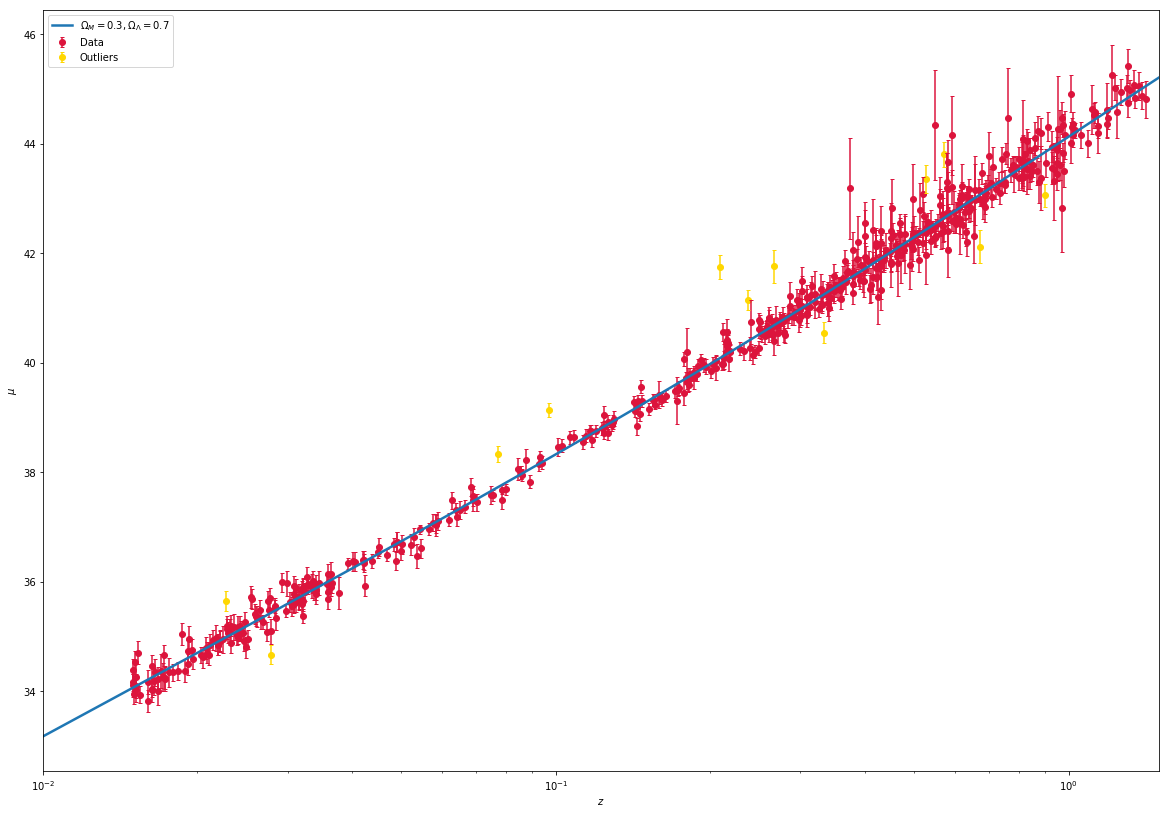

In [333]:
z = np.linspace(0.01, 1.5, 100)

plt.figure(figsize = (20,14))

plt.errorbar(z_data[0:580], mu_data[0:580], yerr = mu_err_data[0:580], marker = 'o', mfc='crimson', mec='crimson', ecolor = 'crimson', elinewidth = 1.5, barsabove = True, capsize = 2.0,  linestyle = 'None', label = 'Data')
plt.errorbar(z_data[580:], mu_data[580:], yerr = mu_err_data[580:], marker = 'o', mfc='gold', mec='gold', ecolor = 'gold', elinewidth = 1.5, barsabove = True, capsize = 2.0,  linestyle = 'None', label = 'Outliers')

mu_theory = np.zeros(len(z))
for i in range(len(z)):
    mu_theory[i] = mu_model(z[i], 0.326233670833, -1.15508240682)

plt.semilogx(z, mu_theory, linewidth = 2.5, label = '$\Omega_M = 0.3, \Omega_{\Lambda} = 0.7$')

plt.legend()
plt.xlim(0.01, 1.5)
plt.xlabel('$z$')
plt.ylabel('$\mu$')
plt.show()

<br><br>
Remember that in HW6, we used the Gaussian mixture to better model the measurements with outliers. Let us apply the same technique in this case.
<br><br>
$$ L = \prod_{i = 1}^{N_{\mathrm{SN}}} \Big[ \frac{g}{\sqrt{2\pi\sigma(\mu_i)^2}}\mathrm{exp}\Big( -\frac{1}{2} \frac{[\mu_{i,\ data}(z_i) - \mu_{i,\ model}(z_i, \Omega_m, w)]^2}{\sigma(\mu_i)^2} \Big) + \frac{1-g}{\sqrt{2\pi\sigma_B^2}}\mathrm{exp}\Big( -\frac{1}{2} \frac{[\mu_{i,\ data}(z_i) - \mu_{i,\ model}(z_i, \Omega_m, w) + \Delta \mu]^2}{\sigma_B^2} \Big) \Big] $$
<br>
Here, we have 5 free parameters: $\Omega_m, w, g, \sigma_B, \Delta \mu$.
<br><br>
With outliers, we think there is something in the noise we do not really understand, which makes error distribution non-Gaussian. So we hope adding a second Gaussian to the model would better describe the pdf. $g$ determines weights on the two Gaussians. $\sigma_B^2$ is the variance of the second Gaussian, which we assume to be larger than the variance of the first Gaussian. $\Delta \mu$ is the distance modulus offset in the second Gaussian.
<br><br>

<span style="color:blue"> <i> 8. Re-run the MCMC code with this new model. Plot 1-d and 2-d constrains of $\Omega_m$ and $w$ as in Part 6 and 7.</i></span><br>

10 percent done
20 percent done
30 percent done
40 percent done
50 percent done
60 percent done
70 percent done
80 percent done
90 percent done


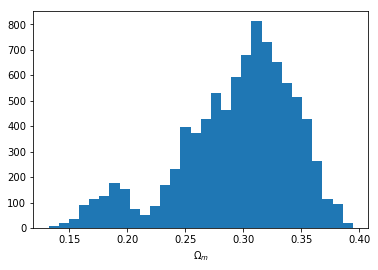

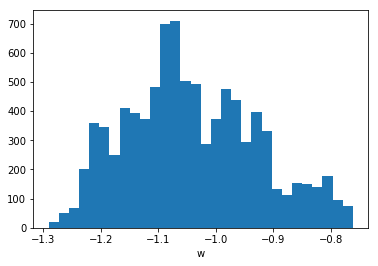

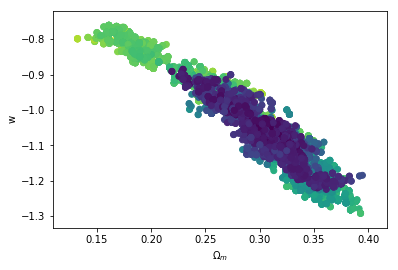

Omega_m =  0.294222220472 +/- 0.0498763116472
w =  -1.04213551634 +/- 0.113784952959


In [216]:
data = np.loadtxt("sn_z_mu_dmu_plow_union2.1_outlier.txt", usecols=range(1,5))
# z
z_data = data[:,0]
# mu
mu_data = data[:,1]
# error on mu (sigma(mu))
mu_err_data = data[:,2]

# length of MCMC chains
nsamples = 15000
# number of parameters
npars    = 5

# Define (gaussian) width of the proposal distribution, one for each parameter. This determines how far you propose jumps
Sigma = 0.01*np.ones(npars)
Sigma[2] = 0.03*np.ones(1)
Sigma[3] = 0.1*np.ones(1)
Sigma[4] = 0.01*np.ones(1)

# Number of supernova:
nSN = len(z_data)

# Declare an empty array of the parameter values of each point. 
# Theta[:,0] stores a trace of the parameter \Omega_m  
# Theta[:,1] stores a trace of the parameter w 
# Theta[:,2] stores a trace of the parameter g
# Theta[:,3] stores a trace of the parameter sigma_B 
# Theta[:,4] stores a trace of the parameter delta mu
# Theta[:,5] stores log-likelihood values at each point
Theta          = np.empty([nsamples,npars+1])

# Dmu stores mu(data)-mu(theory), temporarily:
Dmu = np.empty(nSN)

# Random starting point in parameter space
# Set initial likelihood to low value so next point is accepted (could compute it instead):
Theta[0,:2] = [np.random.uniform(), -np.random.uniform()]
Theta[0,2] = np.random.normal(0.5, 0.1)
Theta[0,3] = np.random.normal(10, 0.1)
Theta[0,4] = np.random.uniform()
Theta[0,npars] = -1.e100

# Define mu from theory
def integrand_DL(z,Omegam,w):
    return (Omegam*(1+z)**3 + (1-Omegam)*(1+z)**(3*(1+w)))**(-1/2)
            
def DL_integrate(z,Omegam,w):
    DLval = 2997.92458/0.7*(1.0+z)*quad(integrand_DL, 0, z, args = (Omegam,w,))[0]
    return DLval

def mu_model(z,Omegam,w):
    mu_model = 25.0 + 5.0*math.log10(DL_integrate(z,Omegam,w))
    return mu_model

# Define the likelihood function:

def lnL(Omegam, w, sigmaB, gs, errs, muoffset):

    # Treat unphysical regions by setting likelihood to (almost) zero:    
    if(Omegam<=0 or w>=0 or gs < 0 or gs > 1.):
        lnL = -1.e100
    else:
            
    # Compute difference with theory mu at redshifts of the SN, for trial Omegam
        for j in range (nSN):
            Dmu[j] = mu_data[j]-mu_model(z_data[j],Omegam,w)

        lnLtemp = np.zeros(nSN)
        for jj in range(nSN):
            L1 = gs/( (2 * np.pi * errs[jj] ** 2)**(1/2) )*np.exp( - 0.5*(Dmu[jj] / errs[jj]) ** 2 )
            L2 = (1-gs)/( (2 * np.pi * sigmaB ** 2)**(1/2) )*np.exp( - 0.5*((Dmu[jj] + muoffset) / sigmaB) ** 2 )
            lnLtemp[jj] = np.log(L1+L2)
        lnL = np.sum(lnLtemp)
        
    return lnL


# Draw new proposed samples from a proposal distribution, centred on old values Omegam[i-1]
# Accept or reject, and colour points according to ln(likelihood):

# Compute initial likelihood value:
Theta[0,npars] = lnL(Theta[0,0], Theta[0,1], Theta[0,3], Theta[0,2], mu_err_data, Theta[0,4])

progress = nsamples/10; val = 0
for i in range(1,nsamples):    
    
    if i%progress == 0:
        val = val + 10
        print("%d percent done" %val)
    
    lnLPrevious = Theta[i-1,npars]
    OmegamProp = np.random.normal(Theta[i-1,0],Sigma[0])
    wProp = np.random.normal(Theta[i-1,1],Sigma[1])
    gvalProp   = np.random.normal(Theta[i-1,2],Sigma[2])
    sigmaProp   = np.random.normal(Theta[i-1,3],Sigma[3])
    offsetProp   = np.random.normal(Theta[i-1,4],Sigma[4])
    
    lnLProp    = lnL(OmegamProp,wProp,sigmaProp,gvalProp,mu_err_data,offsetProp)

    # Metroplis-Hastings algorithm:

    if(lnLProp > lnLPrevious):
    # Accept point if likelihood has gone up:
        Theta[i,0]     = OmegamProp
        Theta[i,1]     = wProp
        Theta[i,2] = gvalProp
        Theta[i,3] = sigmaProp
        Theta[i,4] = offsetProp
        Theta[i,npars] = lnLProp
    else:
    # Otherwise accept it with probability given by ratio of likelihoods:
        alpha = np.random.uniform()
    
        if(lnLProp - lnLPrevious > np.log(alpha)):
            Theta[i,0]     = OmegamProp
            Theta[i,1]     = wProp
            Theta[i,2] = gvalProp
            Theta[i,3] = sigmaProp
            Theta[i,4] = offsetProp
            Theta[i,npars] = lnLProp
        else:
        # Reject; Repeat the previous point in the chain:
            Theta[i,0:5]     = Theta[i-1,0:5]
            Theta[i,npars] = lnLPrevious
            
# Remove a burn in period, arbitrarily chosen to be the first 40% of the chain:
nburn = 4*math.floor(nsamples/10)
    

# Plot the histogram of Omegam after the burn-in phase:
plt.hist(Theta[nburn:,0],bins=30)
plt.xlabel(r'$\Omega_m$')
plt.show()

# Plot the histogram of w after the burn-in phase:
plt.hist(Theta[nburn:,1],bins=30)
plt.xlabel('w')
plt.show()

# Scatter plot of the samples (2-d posterior):
plt.scatter(Theta[nburn:,0], Theta[nburn:,1], c = -Theta[nburn:,npars])
plt.xlabel(r'$\Omega_m$')
plt.ylabel('w')
plt.show() 

# Print best-fit values and constraints
print ('Omega_m = ',np.mean(Theta[nburn:nsamples,0]), '+/-' ,np.std(Theta[nburn:nsamples,0]))
print ('w = ',np.mean(Theta[nburn:nsamples,1]), '+/-' ,np.std(Theta[nburn:nsamples,1]))



***

Reference: See pg. 8-16 (https://lear.inrialpes.fr/~jegou/bishopreadinggroup/chap9.pdf)
<br><br>
For this Gaussian mixture model, we wish to maximize the likelihood function with respect to the parameters $g, \sigma_B, \Delta \mu$ for $\Omega_m = 0.3, w = -1$. In order to do this, we will apply the <b>expectation-maximization (EM)</b> algorithm. This is an iterative method to find maximum likelihood in the case where the model depends on the hidden/latent variable. Here, we call binary variable <b>a</b> as our latent variable such that $p(a_k = 1) = \pi_k$
<br><br>
Re-write the likelihood as:
<br>
$$ L = \prod_{i = 1}^{N_{\mathrm{SN}}} \Big[ \frac{\pi_1}{\sqrt{2\pi\sigma(\mu_i)^2}}\mathrm{exp}\Big( -\frac{1}{2} \frac{[\mu_{i,\ data}(z_i) - \mu_{i,\ model}(z_i, \Omega_m, w)]^2}{\sigma(\mu_i)^2} \Big) + \frac{\pi_2}{\sqrt{2\pi\sigma_B^2}}\mathrm{exp}\Big( -\frac{1}{2} \frac{[\mu_{i,\ data}(z_i) - \mu_{i,\ model}(z_i, \Omega_m, w) + \Delta \mu]^2}{\sigma_B^2} \Big) \Big] $$
<br>
$$ = \prod_{i = 1}^{N_{\mathrm{SN}}} \Big[ \pi_1  \cdot \mathrm{Normal}\big(\mu_{i,\ data}\big|\ \mu_1 = \mu_{i,\ model}, \Sigma_1 \big) + \pi_2 \cdot \mathrm{Normal}\big(\mu_{i,\ data}\big|\ \mu_2 = \mu_{i,\ model} + \Delta \mu, \Sigma_2 \big) \Big] $$
where $\Sigma_1$ and $\Sigma_2$ are $N_{SN} \times N_{SN}$ covariance matrices whose diagonal entries are $\sigma(\mu)^2$ and $\sigma_B^2$, respectively.
<br><br>
1. First, initialize: choose $\pi_1 = 0.95$ and $\pi_1 = 0.05$. Let $\mu_1 = \mu_2 = \mu_{i,\ model}(\Omega_m = 0.3, w = -1)$. $\Sigma_1$ and $\Sigma_2$ are the diagonal matrices whose entries on the diagonal are $\sigma(\mu)^2$ and 2*$\sigma(\mu)^2$.
<br><br>
2. <b>Expectation (E) step</b>: Evaluate the responsibilities using the current parameter values.
<br><br>
$$ \gamma_{nk} = \frac{\pi_k  \cdot \mathrm{Normal}\big(\mu_{i,\ data}\big|\ \mu_k, \Sigma_k \big)}{\pi_1  \cdot \mathrm{Normal}\big(\mu_{i,\ data}\big|\ \mu_1, \Sigma_1 \big) + \pi_2 \cdot \mathrm{Normal}\big(\mu_{i,\ data}\big|\ \mu_2, \Sigma_2 \big)} $$
<br>
where $n = 1, ..., N_{SN}$ (number of measurements) and $k = 1, 2$ (number of Gaussians). Note that $\gamma_{n1}$ is a vector of length $N_{SN}$.
<br><br>
3. <b>Maximization (M) step</b>: Re-estimate the parameters using the current responsibilities
<br><br>
$$ \mu_1, \Sigma_1\ \mathrm{fixed\ at\ initial\ values} $$
$$ \mu_2 = \frac{1}{N_2} \sum_{n=1}^N \gamma_{2k} \mu_{n,\ data}  $$
$$ \Sigma_2 =  \frac{1}{N_2} \sum_{n=1}^N \gamma_{2k} [\mu_{n,\ data}-\mu_2][\mu_{n,\ data}-\mu_2]^T$$
$$ \pi_k = \frac{N_k}{N} $$
<br>
where $N_k = \sum_{n=1}^N \gamma_{nk}$
<br><br>
4. Evaluate the log-likelihood and check for convergence of either the parameters or the log likelihood. If the convergence criterion is not satisfied return to step 2.
<br><br>

<span style="color:blue"> <i> 9. Using EM, calculate the converged values of $\pi_1$, $\pi_2$, and $N_2$. $N_2$ is the total number of SN in the second class (can be identified as outliers). </i></span><br>

Pi_1 =  0.946320359666 , Pi_2 =  0.0536796403343
N_2 =  31.7783470779


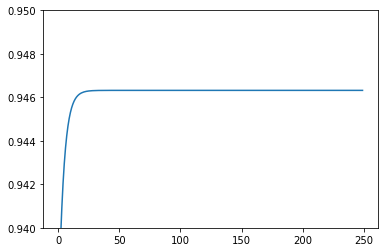

Convergence has reached.


In [4]:
import math

data = np.loadtxt("sn_z_mu_dmu_plow_union2.1_outlier.txt", usecols=range(1,5))
# z
z_data = data[:,0]
# mu
mu_data = data[:,1]
# error on mu (sigma(mu))
mu_err_data = data[:,2]

# Define mu from theory
def integrand_DL(z,Omegam,w):
    return (Omegam*(1+z)**3 + (1-Omegam)*(1+z)**(3*(1+w)))**(-1/2)
            
def DL_integrate(z,Omegam,w):
    DLval = 2997.92458/0.7*(1.0+z)*quad(integrand_DL, 0, z, args = (Omegam,w,))[0]
    return DLval

def mu_model(z,Omegam,w):
    mu_model = 25.0 + 5.0*math.log10(DL_integrate(z,Omegam,w))
    return mu_model

Sigma_1 = np.diag(mu_err_data**2)
Sigma_2 = 2*Sigma_1
sig_2 = np.sqrt(Sigma_2.diagonal())

mu_theory = np.zeros(len(z_data))
for i in range(len(z_data)):
    mu_theory[i] = mu_model(z_data[i],0.3,-1)

    
niteration = 250
    
Pi_1 = np.zeros(niteration)
Pi_2 = np.zeros(niteration)

Dmu = mu_data - mu_theory

temp1 = 0.95/( (2 * np.pi * Sigma_1.diagonal())**(1/2) )*np.exp( -0.5*(Dmu/mu_err_data)**2 )
temp2 = 0.05/( (2 * np.pi * Sigma_2.diagonal())**(1/2) )*np.exp( -0.5*(Dmu/sig_2)**2  )



for i in range(niteration):

    Gamma_n1 = temp1/(temp1 + temp2)
    Gamma_n2 = temp2/(temp1 + temp2)

    N1 = sum(Gamma_n1)
    N2 = sum(Gamma_n2)

    mu_1 = 0
    mu_2 = 1/N2*sum(Gamma_n2*(mu_data-mu_theory))
    
    Pi_1[i] = N1/len(mu_data)
    Pi_2[i] = N2/len(mu_data)
    
    errs_new2 = np.sqrt(1./N2*sum(Gamma_n2*(mu_data-mu_theory-mu_2)**2))
    
    Dmu1 = mu_data - mu_theory - mu_1
    Dmu2 = mu_data - mu_theory - mu_2
    
    cov_new2 = 1./N2*Gamma_n2

    temp1 = Pi_1[i]/( (2 * np.pi * mu_err_data**2)**(1/2) )*np.exp( -0.5*(Dmu1/mu_err_data)**2 )
    temp2 = Pi_2[i]/( (2 * np.pi * errs_new2**2)**(1/2) )*np.exp( -0.5*(Dmu2/errs_new2)**2 ) 


print("Pi_1 = ", Pi_1[-1], ", Pi_2 = ", Pi_2[-1])
print("N_2 = ", N2)

plt.plot(Pi_1)
plt.ylim(0.94, 0.95)
plt.show()
print('Convergence has reached.')

In [8]:
print("The mean value of Gamma_2 for 580 normal supernovae is ", np.mean(Gamma_n2[0:580]))
print("The mean value of Gamma_2 for 12 outliers is ", np.mean(Gamma_n2[580:]))

The mean value of Gamma_2 for 580 normal supernovae is  0.0373908706164
The mean value of Gamma_2 for 12 outliers is  0.8409701767


***

Finally, we use a <b>Boostrap</b> resampling method to estimate the posterior of $\Omega_m$ and $w$.
<br><br>
Suppose that we have 10 measurements of $x$: [3.7, 3.2, 3.3, 3.1, 3.2, 3.5, 2.9, 3.4, 3.0, 3.1]. Now, randomly take 5 samples of 10 data measurements "with replacement."

In [253]:
x = np.array([3.7, 3.2, 3.3, 3.1, 3.2, 3.5, 2.9, 3.4, 3.0, 3.1])

num_samples = 5
len_x = len(x)
idx = np.random.randint(0, len_x, (num_samples, len_x))
print("After bootstrap re-sampling")
print(x[idx])

After bootstrap re-sampling
[[ 3.2  3.1  3.1  3.7  3.5  3.2  3.2  3.   3.2  3.7]
 [ 3.4  3.3  3.1  3.7  3.1  3.4  3.2  3.2  3.   3.1]
 [ 3.1  3.5  3.   3.1  3.3  3.5  3.5  3.2  3.1  3.2]
 [ 3.3  3.1  3.7  3.1  3.3  2.9  2.9  3.   3.1  3. ]
 [ 2.9  3.2  3.   3.   2.9  3.   3.4  3.7  3.5  3.2]]


Say you wish to see the probability distribution of $\bar{x}$. Then, take 100 samples using bootstrap and plot the histogram of $\bar{x}$.


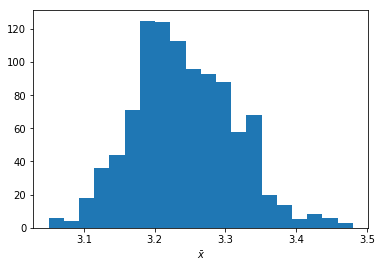

In [264]:
num_samples = 1000
len_x = len(x)
idx = np.random.randint(0, len_x, (num_samples, len_x))
x_bar = np.mean(x[idx], axis = 1)
plt.hist(x_bar,bins=20)
plt.xlabel(r'$\bar{x}$')
plt.show()

Now use bootstrap resampling technique to estimate the posterior of $\Omega_m$ and $w$.
<br><br>
<span style="color:blue"> <i> 10. Take 200 (or more) samples of 580 supernova distance modulus measurements and estimate $\Omega_m$ and $w$ using maximum likelihood estimation, as in Part 3. Plot the 1-d posteriors (histogram).</i></span><br>

In [328]:
data = np.loadtxt("sn_z_mu_dmu_plow_union2.1.txt", usecols=range(1,5))
# z
z_data = data[:,0]
# mu
mu_data = data[:,1]
# error on mu (sigma(mu))
mu_err_data = data[:,2]

In [329]:
def integrand_DL(z,Omegam,w):
    return (Omegam*(1+z)**3 + (1-Omegam)*(1+z)**(3*(1+w)))**(-1/2)
            
def DL_integrate(z,Omegam,w):
    DLval = 2997.92458/0.7*(1.0+z)*quad(integrand_DL, 0, z, args = (Omegam,w,))[0]
    return DLval

def mu_model(z,Omegam,w):
    mu_model = 25.0 + 5.0*math.log10(DL_integrate(z,Omegam,w))
    return mu_model


from scipy import optimize

def minus_log_likelihood(param):
    "Ln of likelihood for flat Universe and SN distance modulus data"
    Omegam, w = param
    
    if(Omegam<=0 or w>=0):
        lnL = -1.e100
    else:
    
        Dmu = np.zeros(len(z_data))
        for j in range (len(z_data)):
            Dmu[j] = mu_data[j]-mu_model(z_data[j],Omegam,w)
        lnL = -0.5*sum((Dmu/mu_err_data)**2)

    return -lnL

In [330]:
num_samples = 200
nSN = len(z_data)
idx = np.random.randint(0, nSN, (num_samples, nSN))

z_new = z_data[idx]
mu_new = mu_data[idx]
mu_err_new = mu_err_data[idx]


progress = num_samples/10; val = 0  
    
Omegam = np.zeros(num_samples)
w = np.zeros(num_samples)
for i in range(num_samples):

    if i%progress == 0:
        print("%d percent done" %val)
        val = val + 10
        
    z_data = z_new[i,:]
    mu_data = mu_new[i,:]
    mu_err_data = mu_err_new[i,:]
    Omegam[i], w[i] = optimize.fmin(minus_log_likelihood, [0, 0], disp=False)


0 percent done
10 percent done
20 percent done
30 percent done
40 percent done
50 percent done
60 percent done
70 percent done
80 percent done
90 percent done


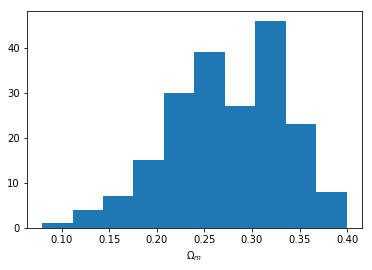

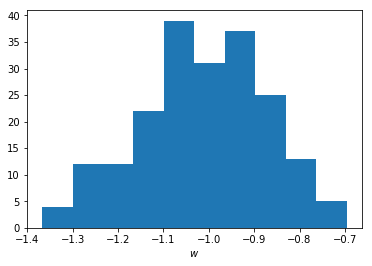

Omega_m =  0.274065250128 +/- 0.0604228223113
w =  -1.01120611722 +/- 0.138425039848


In [331]:
plt.hist(Omegam,bins=10)
plt.xlabel(r'$\Omega_m$')
plt.show()

plt.hist(w,bins=10)
plt.xlabel(r'$w$')
plt.show()

# Print best-fit values and constraints
print ('Omega_m = ',np.mean(Omegam), '+/-' ,np.std(Omegam))
print ('w = ',np.mean(w), '+/-' ,np.std(w))


***

## To Submit
Execute the following cell to submit.
If you make changes, execute the cell again to resubmit the final copy of the notebook, they do not get updated automatically.<br>
__We recommend that all the above cells should be executed (their output visible) in the notebook at the time of submission.__ <br>
Only the final submission before the deadline will be graded. 


In [ ]:
_ = ok.submit()